In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
# from xgboost import XGBClassifier
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题  

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine_df = pd.concat([train_df,test_df])

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
combine_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


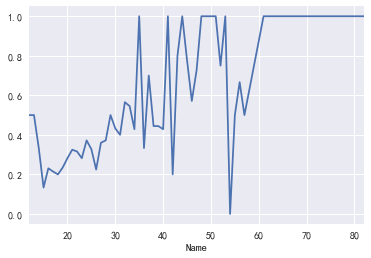

In [7]:
train_df.groupby(train_df.Name.apply(lambda x: len(x)))['Survived'].mean().plot()

In [8]:
combine_df['Name_len'] = combine_df['Name'].apply(lambda x: len(x))
combine_df['Name_len'] = pd.qcut(combine_df['Name_len'], 5)

In [9]:
combine_df['Name_len']

0        (19.0, 23.2]
1        (32.0, 82.0]
2        (19.0, 23.2]
3        (32.0, 82.0]
4        (23.2, 27.0]
5      (11.999, 19.0]
6        (19.0, 23.2]
7        (27.0, 32.0]
8        (32.0, 82.0]
9        (32.0, 82.0]
10       (27.0, 32.0]
11       (23.2, 27.0]
12       (27.0, 32.0]
13       (23.2, 27.0]
14       (32.0, 82.0]
15       (27.0, 32.0]
16       (19.0, 23.2]
17       (27.0, 32.0]
18       (32.0, 82.0]
19       (19.0, 23.2]
20       (19.0, 23.2]
21       (19.0, 23.2]
22       (23.2, 27.0]
23       (27.0, 32.0]
24       (27.0, 32.0]
25       (32.0, 82.0]
26       (19.0, 23.2]
27       (27.0, 32.0]
28       (27.0, 32.0]
29     (11.999, 19.0]
            ...      
388      (19.0, 23.2]
389      (23.2, 27.0]
390      (23.2, 27.0]
391      (32.0, 82.0]
392      (27.0, 32.0]
393      (19.0, 23.2]
394      (23.2, 27.0]
395      (32.0, 82.0]
396      (19.0, 23.2]
397      (32.0, 82.0]
398      (27.0, 32.0]
399      (23.2, 27.0]
400      (19.0, 23.2]
401    (11.999, 19.0]
402      (

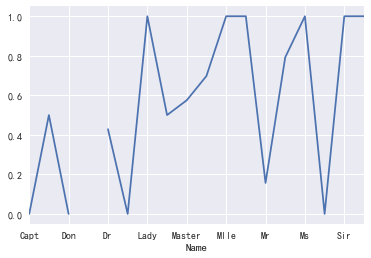

In [10]:
combine_df.groupby(combine_df['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0]))['Survived'].mean().plot()

In [11]:
tmp = combine_df.groupby(combine_df['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0]))

In [12]:
tmp.mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Name,,,,,,,
Capt,70.000000,71.000000,1.000000,746.000000,1.000000,1.000000,0.000000
Col,54.000000,79.518750,0.000000,865.000000,1.000000,0.250000,0.500000
Don,40.000000,27.720800,0.000000,31.000000,1.000000,0.000000,0.000000
Dona,39.000000,108.900000,0.000000,1306.000000,1.000000,0.000000,NaN
Dr,43.571429,53.254687,0.125000,625.750000,1.250000,0.625000,0.428571
Jonkheer,38.000000,0.000000,0.000000,823.000000,1.000000,0.000000,0.000000
Lady,48.000000,39.600000,0.000000,557.000000,1.000000,1.000000,1.000000
Major,48.500000,28.525000,0.000000,493.500000,1.000000,0.000000,0.500000
Master,5.482642,36.008195,1.377049,658.852459,2.655738,2.049180,0.575000


In [13]:
combine_df['Title'] = combine_df['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0])
combine_df['Title'] = combine_df['Title'].replace(['Don', 'Dona', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir', 'Dr'], 'Mr')
combine_df['Title'] = combine_df['Title'].replace(['Mile', 'Ms'], 'Miss')
combine_df['Title'] = combine_df['Title'].replace(['the Countess','Mme','Lady','Dr'], 'Mrs')
df = pd.get_dummies(combine_df['Title'], prefix='Title')

In [14]:
df

,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,1,0,0,0,0
8,0,0,0,0,1
9,0,0,0,0,1


In [15]:
combine_df = pd.concat([combine_df,df], axis=1)
combine_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Name_len,Title,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(19.0, 23.2]",Mr,0,0,0,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(32.0, 82.0]",Mrs,0,0,0,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(19.0, 23.2]",Miss,0,1,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(32.0, 82.0]",Mrs,0,0,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(23.2, 27.0]",Mr,0,0,0,1,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,"(11.999, 19.0]",Mr,0,0,0,1,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,"(19.0, 23.2]",Mr,0,0,0,1,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,"(27.0, 32.0]",Master,1,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,"(32.0, 82.0]",Mrs,0,0,0,0,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,"(32.0, 82.0]",Mrs,0,0,0,0,1


In [16]:
combine_df['Fname'] = combine_df['Name'].apply(lambda x: x.split(',')[0])
combine_df['Familysize'] = combine_df['SibSp'] + combine_df['Parch']

In [17]:
dead_femail_Fname = list(set(combine_df[(combine_df.Sex=='female') & (combine_df.Age>=12)
                                       & (combine_df.Survived==0) & (combine_df.Familysize>1)]['Fname'].values))
survive_male_Fname = list(set(combine_df[(combine_df.Sex=='male') & (combine_df.Age>=12)
                                        & (combine_df.Survived==0) & (combine_df.Familysize>1)]['Fname'].values))

In [18]:
combine_df['Dead_female_family'] = np.where(combine_df['Fname'].isin(dead_femail_Fname),1,0)
combine_df['Survice_male_family'] = np.where(combine_df['Fname'].isin(survive_male_Fname), 1,0)
combine_df= combine_df.drop(['Name', 'Fname'], axis=1)

In [19]:
group = combine_df.groupby(['Title', 'Pclass'])['Age']
combine_df['Age'] = group.transform(lambda x: x.fillna(x.median()))
combine_df = combine_df.drop('Title', axis=1)
combine_df['isChild'] = np.where(combine_df['Age']<=12.0,1,0)
combine_df['Age'] = pd.cut(combine_df['Age'], 5)

# combine_df = combine_df.drop('Age', axis=1)


In [20]:
combine_df['Familysize'] = np.where(combine_df['Familysize'] ==0, 'solo', np.where(combine_df['Familysize']<=3, 'normal', 'big'))
df = pd.get_dummies(combine_df['Familysize'], prefix='Familysize')
combine_df = pd.concat([combine_df, df], axis=1).drop(['SibSp', 'Parch', 'Familysize'])

In [21]:
combine_df['Ticket_pre'] = combine_df['Ticket'].apply(lambda x: str(x)[0])
combine_df['Ticket_pre'] = combine_df['Ticket_pre'].apply(lambda x: str(x))
combine_df['High_Survival_Ticket'] = np.where(combine_df['Ticket_pre'].isin(['1', '2', 'p']),1,0)
combine_df['Low_Survival_Ticket'] = np.where(combine_df['Ticket_pre'].isin(['A','W','3','7']),1,0)
combine_df = combine_df.drop(['Ticket','Ticket_pre'],axis=1)

In [22]:
combine_df.Emarked = combine_df.Embarked.fillna('S')
df = pd.get_dummies(combine_df['Embarked'], prefix='Embarked')
combine_df = pd.concat([combine_df, df], axis=1).drop('Embarked', axis=1)

In [23]:
combine_df['Cabin_isNull'] = np.where(combine_df['Cabin'].isnull(), 0, 1)
combine_df = combine_df.drop('Cabin', axis=1)


In [24]:
df = pd.get_dummies(combine_df['Pclass'], prefix='Pclass')
combine_df = pd.concat([combine_df, df],axis=1).drop('Pclass', axis=1)

In [25]:
df = pd.get_dummies(combine_df['Sex'], prefix='Sex')
combine_df = pd.concat([combine_df, df], axis=1).drop('Sex', axis=1)


In [26]:
combine_df['Fare'] = pd.qcut(combine_df.Fare, 3)


In [27]:
pd.get_dummies(combine_df.Fare,prefix='Fare')

,"Fare_(-0.001, 8.662]","Fare_(8.662, 26.0]","Fare_(26.0, 512.329]"
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,0,1


In [28]:
df = pd.get_dummies(combine_df.Fare,prefix='Fare').drop('Fare_(-0.001, 8.662]',axis=1)

In [29]:
combine_df = pd.concat([combine_df,df],axis=1).drop('Fare',axis=1)

In [30]:
features = combine_df.drop(['PassengerId', 'Survived'],axis=1).columns

In [31]:
enc = OneHotEncoder()

In [32]:
le = LabelEncoder()

In [33]:
for feature in features:
    le = le.fit(combine_df[feature])
    combine_df[feature] = le.transform(combine_df[feature])

In [34]:
combine_df

,Age,Parch,PassengerId,SibSp,Survived,Name_len,Title_Master,Title_Miss,Title_Mlle,Title_Mr,...,Embarked_Q,Embarked_S,Cabin_isNull,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,"Fare_(8.662, 26.0]","Fare_(26.0, 512.329]"
0,1,0,1,1,0.0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,2,0,2,1,1.0,4,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,1,0,3,0,1.0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,2,0,4,1,1.0,4,0,0,0,0,...,0,1,1,1,0,0,1,0,0,1
4,2,0,5,0,0.0,2,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
5,1,0,6,0,0.0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
6,3,0,7,0,0.0,1,0,0,0,1,...,0,1,1,1,0,0,0,1,0,1
7,0,1,8,3,0.0,3,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
8,1,2,9,0,1.0,4,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
9,0,0,10,1,1.0,4,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [35]:
X_all = combine_df.iloc[:891, :].drop(['PassengerId', 'Survived'], axis=1)
Y_all = combine_df.iloc[:891, :]['Survived']
X_test = combine_df.iloc[891:, :].drop(['PassengerId', 'Survived'], axis=1)

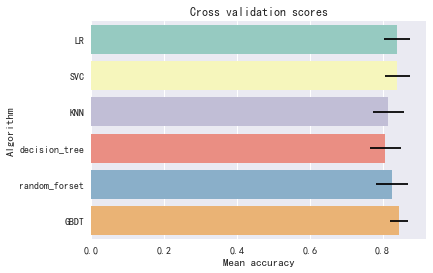

In [36]:
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier()
random_forset = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, class_weight={0:0.745,1:0.255})
gbdt = GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=3)
# xgbGBDT = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
clfs = [lr, svc, knn, decision_tree, random_forset, gbdt]

kfold = 10
cv_results = []
for classifier in clfs:
    cv_results.append(cross_val_score(classifier, X_all, y=Y_all, scoring='accuracy', cv=kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({'CrossValMeans': cv_means, 'CrossValerrors': cv_std,
                      'Algorithm': ['LR', 'SVC', 'KNN', 'decision_tree', 'random_forset', 'GBDT']})
g = sns.barplot('CrossValMeans', 'Algorithm', data=cv_res, palette='Set3', orient='h', **{'xerr':cv_std})
g.set_xlabel('Mean accuracy')
g = g.set_title('Cross validation scores')

In [37]:
class Ensemble(object):
    
    def __init__(self, estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()
        
    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x, train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x,y)
        
    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        return self.clf.predict(x)
        
    def score(self, x, y):
        s = precision_score(y,self.predict(x))
        return s

In [68]:
bag = Ensemble([('lr', lr), ('svc', svc),('rf', random_forset),('gbdt', gbdt)])
score = 0
for i in range(0,10):
    num_test = 0.20
    X_train, X_cv, Y_train, Y_cv = train_test_split(X_all, Y_all, test_size=num_test)
    bag.fit(X_train,Y_train)
#     Y_test = bag.predict(X_test)
    acc_xgb = round(bag.score(X_cv, Y_cv) * 100 ,2)
    score += acc_xgb
print score/10
Y_test = bag.predict(X_test)

83.068


In [74]:
gbdt.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [75]:
Y_test = gbdt.predict(X_test)

In [76]:
submit = pd.DataFrame({'PassengerId':test_df.iloc[:,0], 'Survived': Y_test.astype(np.int32)})

In [77]:
submit.to_csv('submit.csv', index=None)

In [66]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [52]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [44]:
bag = EnvironmentError

In [45]:
train_test_split?

In [46]:
sns.barplot?